In [ ]:
# import libreries 

import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import sys



from sklearn.preprocessing import StandardScaler

In [ ]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
#Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(images , targets), (_, _) = fashion_mnist.load_data()

images = images[:10000]
targets = targets[:10000]

#flatten

images = images.reshape(-1,784)
images = images.astype(float)


## Normalisation

In [ ]:
#Normalize
scaler = StandardScaler()
images = scaler.fit_transform(images)


print("Images shape: ",images.shape)
print("Targets shape :",targets.shape)

Images shape:  (10000, 784)
Targets shape : (10000,)


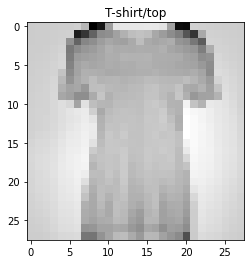

In [ ]:
#Plot images

targets_names =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#plot image 
plt.imshow(images[10].reshape(28,28),cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [ ]:
print("First lignes of one image", images[11])
print("Associated target",targets[11])

First lignes of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0

## Create model and Add Layers

In [ ]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape = [28,28]))

#Add Layers
model.add(tf.keras.layers.Dense(256, activation="relu"))  #Hiden layer 1 
model.add(tf.keras.layers.Dense(128, activation="relu"))  #Hiden layer 2
model.add(tf.keras.layers.Dense(10, activation="softmax"))  #Output layer wtih 10 classes 


model_output = model.predict(images[0:1])
#print("- Image and target",images[0:1],targets[0:1])
print("- Image predicted:",model_output,targets[0:1])

1/1 [==============================] - 0s 233ms/step
- Image predicted:
 [[0.0039963  0.02841105 0.02139365 0.01542382 0.02949101 0.02425352
  0.00791081 0.40326148 0.41504568 0.05081266]]
- Target predicted:
 [9]


## Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile

In [ ]:
# Compile the  model

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer ="sgd",
    metrics=["accuracy"]
)

## Train model 

In [ ]:
history = model.fit(images,targets,epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 0.7899 - accuracy: 0.7360
Epoch 2/10
313/313 [==============================] - 1s 5ms/step - loss: 0.4933 - accuracy: 0.8275
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.4241 - accuracy: 0.8501
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3818 - accuracy: 0.8658
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3523 - accuracy: 0.8767
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3288 - accuracy: 0.8859
Epoch 7/10
313/313 [==============================] - 1s 5ms/step - loss: 0.3072 - accuracy: 0.8938
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2887 - accuracy: 0.9014
Epoch 9/10
313/313 [==============================] - 1s 5ms/step - loss: 0.2724 - accuracy: 0.9064
Epoch 10/10
313/313 [==============================] - 1s 5ms/step - loss: 0.2577 - accuracy: 0.9127

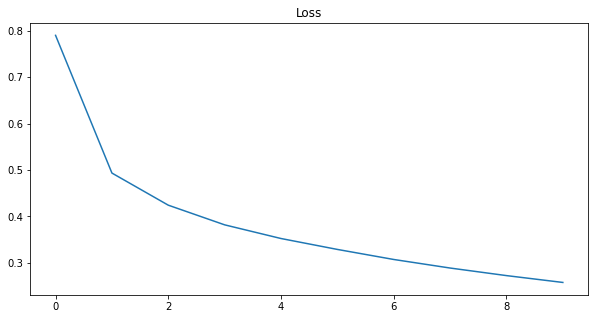

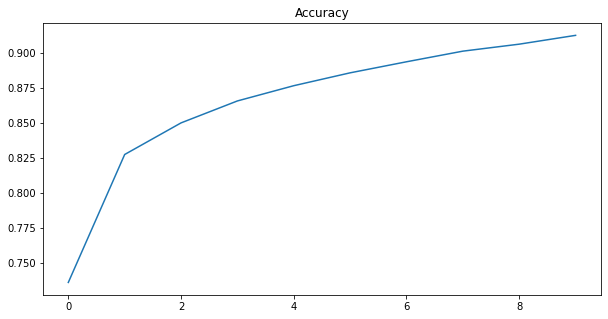

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

#comfig plot 
plt.figure(figsize=(10,5))

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()